In [1]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.sys.path.append('../')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
import mplhep as hep
hep.style.use("CMS")

# Different pileup results

In [5]:
!ls -lh /media/lucas/MicroSD/l1_nnt/

total 9.7G
-rw-r--r-- 1 lucas lucas 2.2M Jan 12 16:09 mc_25k.pkl
-rw-r--r-- 1 lucas lucas 5.4M Jan 12 16:09 mc.pkl
-rw-rw-r-- 1 lucas lucas 6.2K Jan 26 11:28 n_tracks.pdf
-rw-r--r-- 1 lucas lucas 4.9G Jan 12 16:09 OldKF_TTbar_170K_quality.root
-rwxrwxr-x 1 lucas lucas 2.4G Jan 24 14:13 PV.pickle
-rw-r--r-- 1 lucas lucas 128M Jan 12 16:12 tp_25k.pkl
-rw-r--r-- 1 lucas lucas 1.2G Jan 12 16:11 tp.pkl
-rw-r--r-- 1 lucas lucas 133M Jan 12 16:14 trk_25k.pkl
-rw-r--r-- 1 lucas lucas 1.2G Jan 12 16:14 trk.pkl


In [43]:
storage = "/media/lucas/MicroSD/l1_nnt/"
trk = pd.read_pickle(storage+"trk.pkl")
tp = pd.read_pickle(storage+"tp.pkl")
mc = pd.read_pickle(storage+"mc.pkl")

In [44]:
from primaryvertexingtools import create_pv_truth_labels, remove_nans

In [45]:
trk = remove_nans(trk, feature="trk_eta")
trk = create_pv_truth_labels(trk, truth_label="trk_fake", truth_label_out = "is_pv")

from prim

In [46]:
trk['event_number'] = trk.index.get_level_values(0).values

In [47]:
tp['event_number'] = tp.index.get_level_values(0).values

In [48]:
n_tracks = trk.groupby(level=0)['trk_pt'].count()

In [49]:
bin1_event_numbers = n_tracks[n_tracks <= 160].index.values
bin2_event_numbers = n_tracks[(n_tracks > 160) & (n_tracks <= 200)].index.values
bin3_event_numbers = n_tracks[(n_tracks > 200)].index.values

In [50]:
trk_bin1 = trk.loc[trk['event_number'].isin(bin1_event_numbers)]
trk_bin2 = trk.loc[trk['event_number'].isin(bin2_event_numbers)]
trk_bin3 = trk.loc[trk['event_number'].isin(bin3_event_numbers)]

In [51]:
n_tracks[n_tracks<=160].mean()


144.4284502742127

In [52]:
n_tracks[(n_tracks>160) &(n_tracks <= 200)].mean()

180.331932734393

In [53]:
n_tracks[n_tracks>200].mean()

220.66458706629743

In [64]:
tp_bin1 = tp.loc[tp['event_number'].isin(bin1_event_numbers)].copy()
tp_bin2 = tp.loc[tp['event_number'].isin(bin2_event_numbers)].copy()
tp_bin3 = tp.loc[tp['event_number'].isin(bin3_event_numbers)].copy()

In [65]:
mc['event_number'] = mc.index.get_level_values(0).values

In [66]:
mc_bin1 = mc.loc[mc['event_number'].isin(bin1_event_numbers)].copy()
mc_bin2 = mc.loc[mc['event_number'].isin(bin2_event_numbers)].copy()
mc_bin3 = mc.loc[mc['event_number'].isin(bin3_event_numbers)].copy()

In [67]:
tp_bin1.to_pickle(storage+"tp_bin1.pkl")
tp_bin2.to_pickle(storage+"tp_bin2.pkl")
tp_bin3.to_pickle(storage+"tp_bin3.pkl")
trk_bin1.to_pickle(storage+"trk_bin1.pkl")
trk_bin2.to_pickle(storage+"trk_bin2.pkl")
trk_bin3.to_pickle(storage+"trk_bin3.pkl")
mc_bin1.to_pickle(storage+"mc_bin1.pkl")
mc_bin2.to_pickle(storage+"mc_bin2.pkl")
mc_bin3.to_pickle(storage+"mc_bin3.pkl")

# Instatiating classes 

In [68]:
from primaryvertexingtools import PrimaryVertexing, PerformanceMetrics

In [69]:
pv_setup1 = {
    "fh_bins": np.linspace(-15, 15, 256),
    "truth_data": mc_bin1,
    "track_data": trk_bin1,
    "test_run": False
}
pv_setup2 = {
    "fh_bins": np.linspace(-15, 15, 256),
    "truth_data": mc_bin2,
    "track_data": trk_bin2,
    "test_run": False
}
pv_setup3 = {
    "fh_bins": np.linspace(-15, 15, 256),
    "truth_data": mc_bin3,
    "track_data": trk_bin3,
    "test_run": False
}

In [70]:
pv1 = PrimaryVertexing(pv_setup1)
pv2 = PrimaryVertexing(pv_setup2)
pv3 = PrimaryVertexing(pv_setup3)

Initialized Primary Vertexing setup
Initialized Primary Vertexing setup
Initialized Primary Vertexing setup


# Run fast histos

In [71]:
pv1.run_fh()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53061/53061 [00:20<00:00, 2645.54it/s]
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_fh"] = pv_fh
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Ran Fast Histo


In [72]:
pv2.run_fh()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108525/108525 [00:52<00:00, 2077.79it/s]
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_fh"] = pv_fh
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Ran Fast Histo


In [73]:
pv3.run_fh()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61390/61390 [00:25<00:00, 2446.94it/s]
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_fh"] = pv_fh
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Ran Fast Histo


In [75]:
pv1.trk

trk_pt   trk_eta   trk_phi  trk_d0     trk_z0  trk_fake  \
entry  subentry                                                              
0      0         2.623967  1.301414 -0.289234   999.0  -0.878906         2   
       1         3.435026  0.566814 -0.159267   999.0   3.339844         2   
       2         3.774908  1.815973 -0.240375   999.0   4.921875         1   
       3         2.641448 -1.435747 -0.128747   999.0  -0.468750         2   
       4         2.320653  1.837421  0.032604   999.0   4.980469         1   
...                   ...       ...       ...     ...        ...       ...   
222973 153       2.327952  1.944034 -0.237651   999.0  -0.585938         2   
       154       2.006145 -2.219047 -0.908713   999.0  10.195312         2   
       155       5.391940  2.357763 -0.499422   999.0  -1.523438         2   
       156       1.952859 -2.199984 -0.324764   999.0  -3.632812         2   
       157       3.152188  2.307447 -0.330013   999.0  -3.632812         2   

                 is_pv  event_number  z0_reco_fh  distance_from_pv_fh  \
entry  subentry                                                         
0      0             0             0    4.863511             5.742417   
       1             0             0    4.863511             1.523667   
       2             1             0    4.863511             0.058364   
       3             0             0    4.863511             5.332261   
       4             1             0    4.863511             0.116958   
...                ...           ...         ...                  ...   
222973 153           0        222973   -3.573989             2.988051   
       154           0        222973   -3.573989            13.769301   
       155           0        222973   -3.573989             2.050551   
       156           0        222973   -3.573989             0.058824   
       157           0        222973   -3.573989             0.058824   

                 trk_pv_assoc_fh  
entry  subentry                   
0      0                     0.0  
       1                     0.0  
       2                     1.0  
       3                     0.0  
       4                     1.0  
...                          ...  
222973 153                   0.0  
       154                   0.0  
       155                   1.0  
       156                   1.0  
       157                   1.0  

[7663518 rows x 11 columns]

In [74]:
pv3.trk

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0  trk_fake  \
entry  subentry                                                             
4      0         2.609780  0.285181 -0.442419   999.0 -1.171875         2   
       1         2.323567 -1.534982 -0.354673   999.0  3.046875         2   
       2         2.467112  0.730226 -0.341335   999.0  0.761719         2   
       3         2.074366  1.806646 -0.294020   999.0  9.667969         2   
       4         2.914677  0.320649  0.037127   999.0 -3.222656         2   
...                   ...       ...       ...     ...       ...       ...   
222975 211       2.044568 -2.407456 -0.857553   999.0  1.113281         2   
       212       2.491473 -2.141478 -0.616329   999.0  8.847656         2   
       213       2.669393  2.230316 -0.748241   999.0 -0.234375         2   
       214       3.767222 -1.994298 -0.753691   999.0 -4.746094         2   
       215       1.988538 -2.052655 -0.790385   999.0  0.996094         2   

                 is_pv  event_number  z0_reco_fh  distance_from_pv_fh  \
entry  subentry                                                         
4      0             0             4   -1.464614             0.292739   
       1             0             4   -1.464614             4.511489   
       2             0             4   -1.464614             2.226333   
       3             0             4   -1.464614            11.132583   
       4             0             4   -1.464614             1.758042   
...                ...           ...         ...                  ...   
222975 211           0        222975    1.347886             0.234605   
       212           0        222975    1.347886             7.499770   
       213           0        222975    1.347886             1.582261   
       214           0        222975    1.347886             6.093980   
       215           0        222975    1.347886             0.351792   

                 trk_pv_assoc_fh  
entry  subentry                   
4      0                     1.0  
       1                     0.0  
       2                     0.0  
       3                     0.0  
       4                     0.0  
...                          ...  
222975 211                   0.0  
       212                   0.0  
       213                   1.0  
       214                   0.0  
       215                   1.0  

[13546599 rows x 11 columns]

# Run DBSCAN

In [76]:
pv1.run_dbscan()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53061/53061 [03:39<00:00, 241.41it/s]
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_db"] = pv_dbscan["z0_reco_db"]


Ran DBSCAN with eps: 0.08, minPts: 2


/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["trk_pv_assoc_db"] = pv_dbscan["db_pv_label"]


In [77]:
pv2.run_dbscan()


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108525/108525 [07:48<00:00, 231.66it/s]
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_db"] = pv_dbscan["z0_reco_db"]


Ran DBSCAN with eps: 0.08, minPts: 2


/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["trk_pv_assoc_db"] = pv_dbscan["db_pv_label"]


In [78]:
pv3.run_dbscan()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61390/61390 [04:33<00:00, 224.70it/s]
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_db"] = pv_dbscan["z0_reco_db"]


Ran DBSCAN with eps: 0.08, minPts: 2


/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["trk_pv_assoc_db"] = pv_dbscan["db_pv_label"]


# Performance metrics

In [130]:
pm1.trk

trk_pt   trk_eta   trk_phi  trk_d0     trk_z0  trk_fake  \
entry  subentry                                                              
0      0         2.623967  1.301414 -0.289234   999.0  -0.878906         2   
       1         3.435026  0.566814 -0.159267   999.0   3.339844         2   
       2         3.774908  1.815973 -0.240375   999.0   4.921875         1   
       3         2.641448 -1.435747 -0.128747   999.0  -0.468750         2   
       4         2.320653  1.837421  0.032604   999.0   4.980469         1   
...                   ...       ...       ...     ...        ...       ...   
222973 153       2.327952  1.944034 -0.237651   999.0  -0.585938         2   
       154       2.006145 -2.219047 -0.908713   999.0  10.195312         2   
       155       5.391940  2.357763 -0.499422   999.0  -1.523438         2   
       156       1.952859 -2.199984 -0.324764   999.0  -3.632812         2   
       157       3.152188  2.307447 -0.330013   999.0  -3.632812         2   

                 is_pv  event_number  z0_reco_fh  distance_from_pv_fh  \
entry  subentry                                                         
0      0             0             0    4.863511             5.742417   
       1             0             0    4.863511             1.523667   
       2             1             0    4.863511             0.058364   
       3             0             0    4.863511             5.332261   
       4             1             0    4.863511             0.116958   
...                ...           ...         ...                  ...   
222973 153           0        222973   -3.573989             2.988051   
       154           0        222973   -3.573989            13.769301   
       155           0        222973   -3.573989             2.050551   
       156           0        222973   -3.573989             0.058824   
       157           0        222973   -3.573989             0.058824   

                 trk_pv_assoc_fh  z0_reco_db  trk_pv_assoc_db  z0_reco_fh_cor  \
entry  subentry                                                                 
0      0                     0.0    4.980469                0        4.982426   
       1                     0.0    4.980469                0        4.982426   
       2                     1.0    4.980469                1        4.982426   
       3                     0.0    4.980469                0        4.982426   
       4                     1.0    4.980469                1        4.982426   
...                          ...         ...              ...             ...   
222973 153                   0.0   -3.574219                0       -3.455074   
       154                   0.0   -3.574219                0       -3.455074   
       155                   1.0   -3.574219                0       -3.455074   
       156                   1.0   -3.574219                1       -3.455074   
       157                   1.0   -3.574219                1       -3.455074   

                 z0_reco_db_cor  
entry  subentry                  
0      0               5.014663  
       1               5.014663  
       2               5.014663  
       3               5.014663  
       4               5.014663  
...                         ...  
222973 153            -3.607869  
       154            -3.607869  
       155            -3.607869  
       156            -3.607869  
       157            -3.607869  

[7663518 rows x 15 columns]

In [132]:
fh_metrics = []
db_metrics = []
for _pv in [pv1, pv2, pv3]:
    _pv.trk['distance_from_pv_fh'] = np.abs(_pv.trk['z0_reco_fh_cor'] - _pv.trk['trk_z0'])
    _pv.trk["trk_pv_assoc_fh"] = _pv.fh_pv_association(_pv.trk["distance_from_pv_fh"], _pv.trk["trk_eta"])
    fh_metric = _pv.trk_vertex_association(
    _pv.trk['is_pv'].values, _pv.trk["trk_pv_assoc_fh"].values)
    fh_metrics.append(fh_metric)
    
    print("Fast Histo: ", fh_metric)
    
    _pv.trk["distance_from_pv_db"] = np.abs(_pv.trk["z0_reco_db_cor"]-_pv.trk["trk_z0"])
    _pv.trk["trk_pv_assoc_db"] = _pv.fh_pv_association(_pv.trk["distance_from_pv_db"], _pv.trk["trk_eta"])
    
    db_metric = _pv.trk_vertex_association(
    _pv.trk["is_pv"].values, _pv.trk["trk_pv_assoc_db"].values)
    
    db_metrics.append(db_metric)
    print("DBSCAN: ",  db_metric)
    

/tmp/ipykernel_219969/1694927131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk['distance_from_pv_fh'] = np.abs(_pv.trk['z0_reco_fh_cor'] - _pv.trk['trk_z0'])
/tmp/ipykernel_219969/1694927131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["trk_pv_assoc_fh"] = _pv.fh_pv_association(_pv.trk["distance_from_pv_fh"], _pv.trk["trk_eta"])


Fast Histo:  {'tn': 5514003, 'fp': 927996, 'fn': 84426, 'tp': 1137093, 'TPR': 0.9308844152239957, 'FPR': 0.14405404285222645, 'AUC': 0.8934151861858847}


/tmp/ipykernel_219969/1694927131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["distance_from_pv_db"] = np.abs(_pv.trk["z0_reco_db_cor"]-_pv.trk["trk_z0"])
/tmp/ipykernel_219969/1694927131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["trk_pv_assoc_db"] = _pv.fh_pv_association(_pv.trk["distance_from_pv_db"], _pv.trk["trk_eta"])


DBSCAN:  {'tn': 5485658, 'fp': 956341, 'fn': 85929, 'tp': 1135590, 'TPR': 0.9296539800035857, 'FPR': 0.148454074581508, 'AUC': 0.8905999527110389}


/tmp/ipykernel_219969/1694927131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk['distance_from_pv_fh'] = np.abs(_pv.trk['z0_reco_fh_cor'] - _pv.trk['trk_z0'])
/tmp/ipykernel_219969/1694927131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["trk_pv_assoc_fh"] = _pv.fh_pv_association(_pv.trk["distance_from_pv_fh"], _pv.trk["trk_eta"])


Fast Histo:  {'tn': 14208941, 'fp': 2380340, 'fn': 216451, 'tp': 2764791, 'TPR': 0.9273956961561658, 'FPR': 0.14348662850427332, 'AUC': 0.8919545338259462}


/tmp/ipykernel_219969/1694927131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["distance_from_pv_db"] = np.abs(_pv.trk["z0_reco_db_cor"]-_pv.trk["trk_z0"])
/tmp/ipykernel_219969/1694927131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["trk_pv_assoc_db"] = _pv.fh_pv_association(_pv.trk["distance_from_pv_db"], _pv.trk["trk_eta"])


DBSCAN:  {'tn': 14119874, 'fp': 2469407, 'fn': 217637, 'tp': 2763605, 'TPR': 0.9269978753821394, 'FPR': 0.14885557728511561, 'AUC': 0.8890711490485118}


/tmp/ipykernel_219969/1694927131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk['distance_from_pv_fh'] = np.abs(_pv.trk['z0_reco_fh_cor'] - _pv.trk['trk_z0'])
/tmp/ipykernel_219969/1694927131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["trk_pv_assoc_fh"] = _pv.fh_pv_association(_pv.trk["distance_from_pv_fh"], _pv.trk["trk_eta"])


Fast Histo:  {'tn': 9907842, 'fp': 1645603, 'fn': 153874, 'tp': 1839280, 'TPR': 0.9227987400873189, 'FPR': 0.14243396666535393, 'AUC': 0.8901823867109825}


/tmp/ipykernel_219969/1694927131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["distance_from_pv_db"] = np.abs(_pv.trk["z0_reco_db_cor"]-_pv.trk["trk_z0"])
/tmp/ipykernel_219969/1694927131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _pv.trk["trk_pv_assoc_db"] = _pv.fh_pv_association(_pv.trk["distance_from_pv_db"], _pv.trk["trk_eta"])


DBSCAN:  {'tn': 9834687, 'fp': 1718758, 'fn': 154007, 'tp': 1839147, 'TPR': 0.9227320116759669, 'FPR': 0.14876584430012002, 'AUC': 0.8869830836879233}


In [79]:
pm1 = PerformanceMetrics(pv1)
pm2 = PerformanceMetrics(pv2)
pm3 = PerformanceMetrics(pv3)

/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["event_number"] = self.trk.index.get_level_values(0).values
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_fh_cor"] = self.trk["z0_reco_fh"] + bias
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:208: SettingWithCopyWarning: 
A value is trying to be set on

0.118915215
positive bias 0.034193933
negative bias -0.03364992


/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["event_number"] = self.trk.index.get_level_values(0).values
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_fh_cor"] = self.trk["z0_reco_fh"] + bias
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:208: SettingWithCopyWarning: 
A value is trying to be set on

0.118837714
positive bias 0.03460121
negative bias -0.034811676


/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["event_number"] = self.trk.index.get_level_values(0).values
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.trk["z0_reco_fh_cor"] = self.trk["z0_reco_fh"] + bias
/home/lucas/Documents/RA/db-clustering/notebooks/primaryvertexingtools.py:208: SettingWithCopyWarning: 
A value is trying to be set on

0.118644714
positive bias 0.0342772
negative bias -0.03402424


In [81]:
help(pm1.pv_efficiency)

Help on method pv_efficiency in module primaryvertexingtools:

pv_efficiency(res: <built-in function array>, display=False) method of primaryvertexingtools.PerformanceMetrics instance



In [82]:
pm1.pv_efficiency((pm1.z0_gen-pm1.z0_reco_db_cor), display=True)

76.27 %


In [83]:
pm2.pv_efficiency((pm2.z0_gen-pm2.z0_reco_db_cor), display=True)

78.46 %


In [84]:
pm3.pv_efficiency((pm3.z0_gen-pm3.z0_reco_db_cor), display=True)

79.26 %


In [115]:
pm1.pv_efficiency((pm1.z0_gen-pm1.z0_reco_fh_cor), display=True)
pm2.pv_efficiency((pm2.z0_gen-pm2.z0_reco_fh_cor), display=True)
pm3.pv_efficiency((pm3.z0_gen-pm3.z0_reco_fh_cor),  display=True)

72.72 %
75.06 %
76.71 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


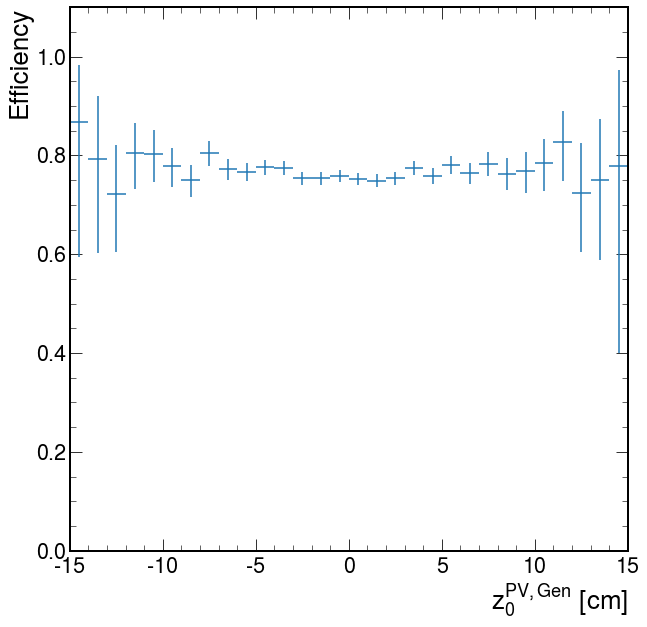

In [88]:
db1 = pm1.plot_pv_efficiency_z0(z0_gen=pm1.z0_gen, z0_reco=pm1.z0_reco_db_cor)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


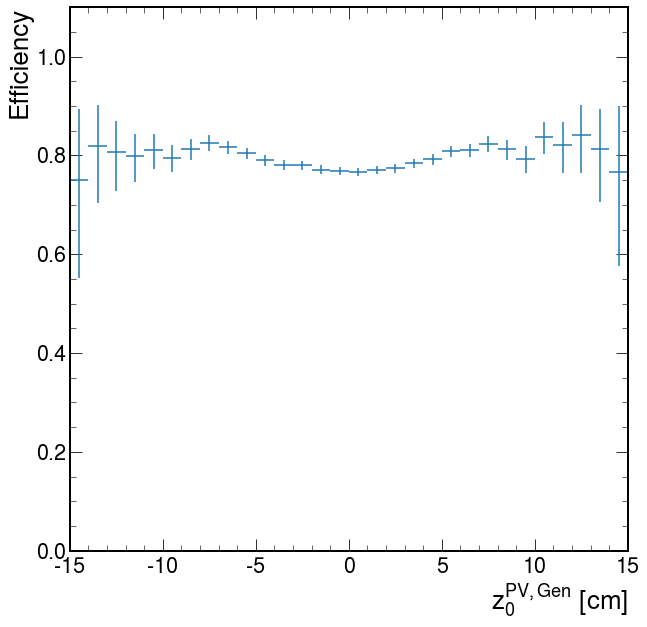

In [89]:
db2 = pm2.plot_pv_efficiency_z0(z0_gen=pm2.z0_gen, z0_reco=pm2.z0_reco_db_cor)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


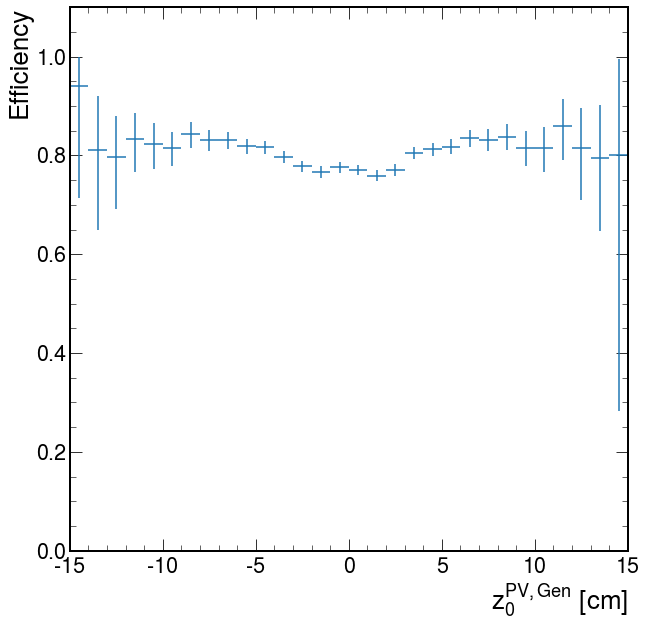

In [90]:
db3 = pm3.plot_pv_efficiency_z0(z0_gen=pm3.z0_gen, z0_reco=pm3.z0_reco_db_cor)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


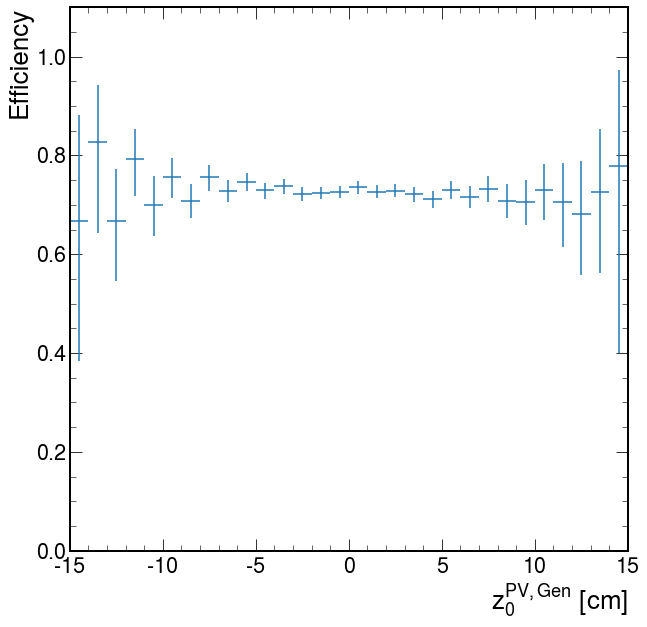

In [92]:
fh1 = pm1.plot_pv_efficiency_z0(z0_gen=pm1.z0_gen, z0_reco=pm1.z0_reco_fh_cor)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


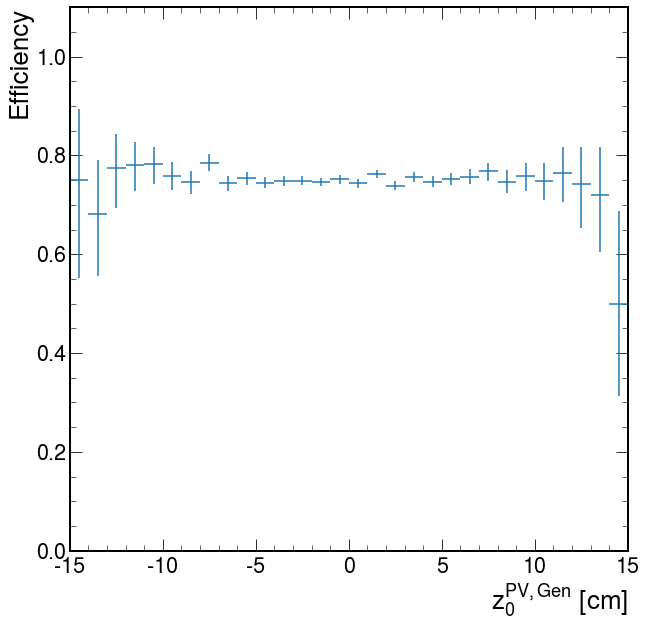

In [93]:
fh2 = pm2.plot_pv_efficiency_z0(z0_gen=pm2.z0_gen, z0_reco=pm2.z0_reco_fh_cor)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


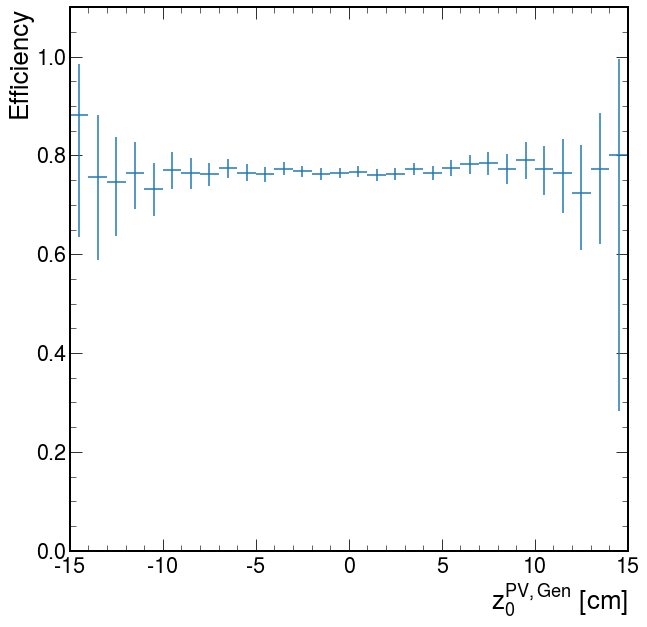

In [94]:
fh3 = pm3.plot_pv_efficiency_z0(z0_gen=pm3.z0_gen, z0_reco=pm3.z0_reco_fh_cor)

Text(0, 1, 'Efficiency')

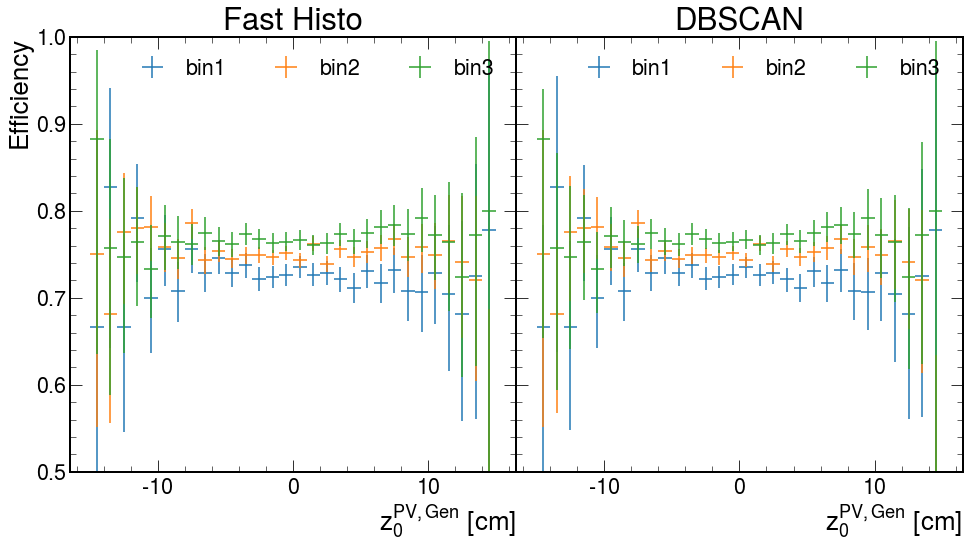

In [129]:
f, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True, sharex=True)
ax[0].errorbar(fh1['x'], fh1['eff'], xerr=fh1['error_x'],yerr=[fh1['lower_error'], fh1['upper_error']], ls = 'none', label = 'bin1')
ax[0].errorbar(fh2['x'], fh2['eff'], xerr=fh2['error_x'],yerr=[fh2['lower_error'], fh2['upper_error']], ls = 'none', label = 'bin2')
ax[0].errorbar(fh3['x'], fh3['eff'], xerr=fh3['error_x'],yerr=[fh3['lower_error'], fh3['upper_error']], ls = 'none', label = 'bin3')

ax[1].errorbar(db1['x'], fh1['eff'], xerr=db1['error_x'],yerr=[db1['lower_error'], db1['upper_error']], ls = 'none', label = 'bin1')
ax[1].errorbar(db2['x'], fh2['eff'], xerr=db2['error_x'],yerr=[db2['lower_error'], db2['upper_error']], ls = 'none', label = 'bin2')
ax[1].errorbar(db3['x'], fh3['eff'], xerr=db3['error_x'],yerr=[db3['lower_error'], db3['upper_error']], ls = 'none', label = 'bin3')




ax[0].legend(ncol= 3)
ax[1].legend(ncol=3)
plt.subplots_adjust(wspace=0)
ax[0].set_ylim(0.5, 1.0)
ax[0].set_title('Fast Histo')
ax[1].set_title('DBSCAN')
ax[0].set_xlabel(r'$z_{0}^{PV, Gen}$ [cm]')
ax[1].set_xlabel(r'$z_{0}^{PV, Gen}$ [cm]')
ax[0].set_ylabel(r'Efficiency')

In [114]:
bins_mid = [144.4284, 180.3319, 220.6647]

In [116]:
fh_p = [72.72, 75.06, 76.71]
db_p = [76.27, 78.46, 79.26]

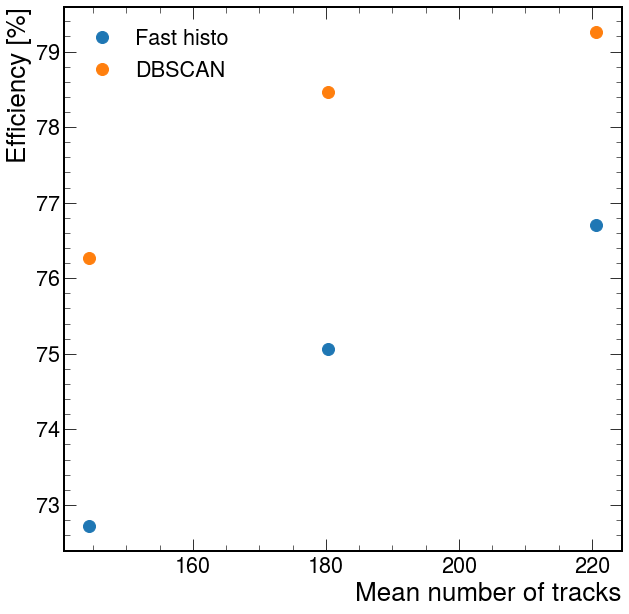

In [128]:
plt.plot(bins_mid, fh_p ,'o', label ='Fast histo', ms=12,)
plt.plot(bins_mid, db_p,'o', label = 'DBSCAN', ms=12)
plt.xlabel('Mean number of tracks')
plt.ylabel('Efficiency [%]')
plt.legend()

In [173]:
db_metrics

[{'tn': 5485658,
  'fp': 956341,
  'fn': 85929,
  'tp': 1135590,
  'TPR': 0.9296539800035857,
  'FPR': 0.148454074581508,
  'AUC': 0.8905999527110389},
 {'tn': 14119874,
  'fp': 2469407,
  'fn': 217637,
  'tp': 2763605,
  'TPR': 0.9269978753821394,
  'FPR': 0.14885557728511561,
  'AUC': 0.8890711490485118},
 {'tn': 9834687,
  'fp': 1718758,
  'fn': 154007,
  'tp': 1839147,
  'TPR': 0.9227320116759669,
  'FPR': 0.14876584430012002,
  'AUC': 0.8869830836879233}]

In [144]:
db_FPR = [0.14845, 0.14885, 0.14876]
db_TPR = [0.92965, 0.92699, 0.92273]
fh_FPR = [0.14405, 0.14348, 0.14243]
fh_TPR = [0.93088, 0.92739, 0.92289]

In [174]:
fh_AUC = [0.89341, 0.89195, 0.890182] 
db_AUC = [0.89059, 0.88907, 0.88698]

(0.14, 0.15)

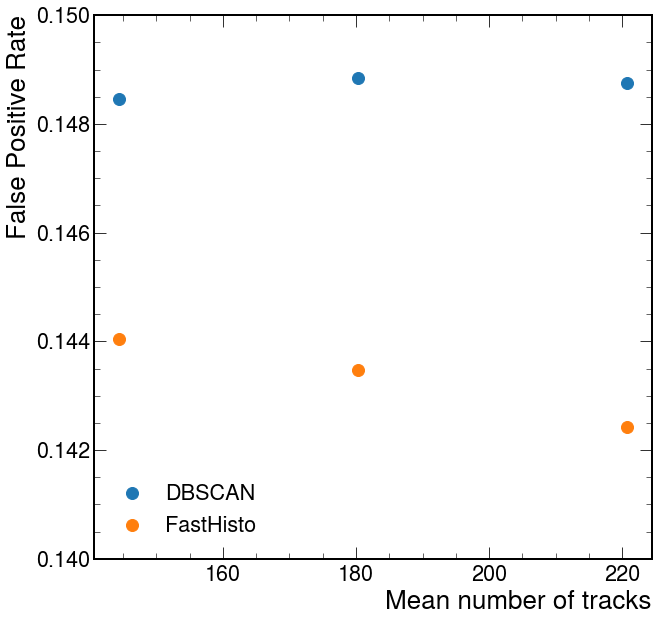

In [155]:
plt.plot(bins_mid, db_FPR, 'o', label ='DBSCAN', ms=12)
plt.plot(bins_mid, fh_FPR,'o', label ='FastHisto', ms=12)
plt.legend()
plt.xlabel('Mean number of tracks')
plt.ylabel("False Positive Rate")
plt.ylim(0.14, 0.15)

(0.92, 0.935)

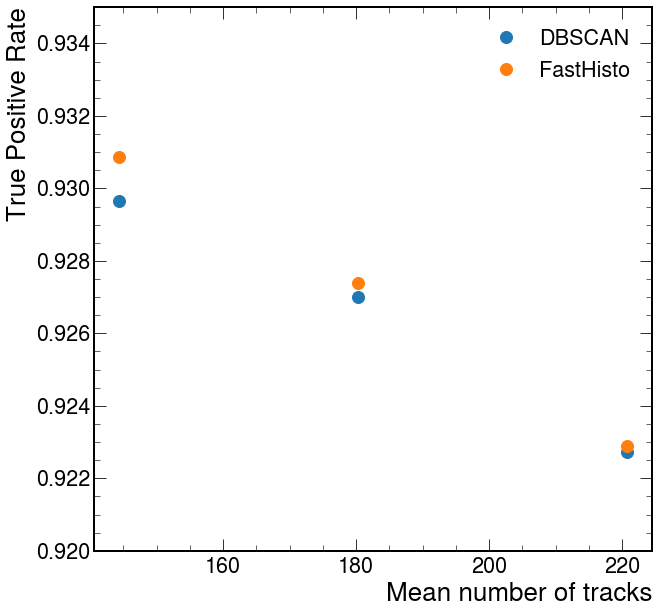

In [159]:
plt.plot(bins_mid, db_TPR, 'o', label ='DBSCAN', ms=12)
plt.plot(bins_mid, fh_TPR,'o', label ='FastHisto', ms=12)
plt.legend()
plt.xlabel('Mean number of tracks')
plt.ylabel("True Positive Rate")
plt.ylim(0.92, 0.935)

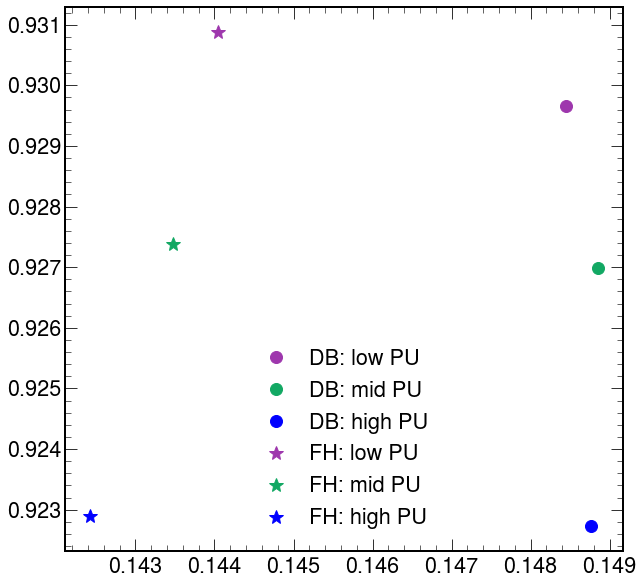

In [172]:
plt.plot(db_FPR[0], db_TPR[0], 'o', label = 'DB: low PU',ms=12, color="#9E37AD")
plt.plot(db_FPR[1], db_TPR[1], 'o', label= 'DB: mid PU',ms=12, color="#12A863")
plt.plot(db_FPR[2], db_TPR[2], 'o', label = 'DB: high PU',ms=12, color= 'blue')
plt.plot(fh_FPR[0], fh_TPR[0], '*', label = 'FH: low PU',ms=14, color="#9E37AD")
plt.plot(fh_FPR[1], fh_TPR[1],'*', label = 'FH: mid PU',ms=14,color="#12A863")
plt.plot(fh_FPR[2], fh_TPR[2], '*', label = 'FH: high PU',ms=14, color='blue')
plt.legend()

Text(0, 1, 'AUC')

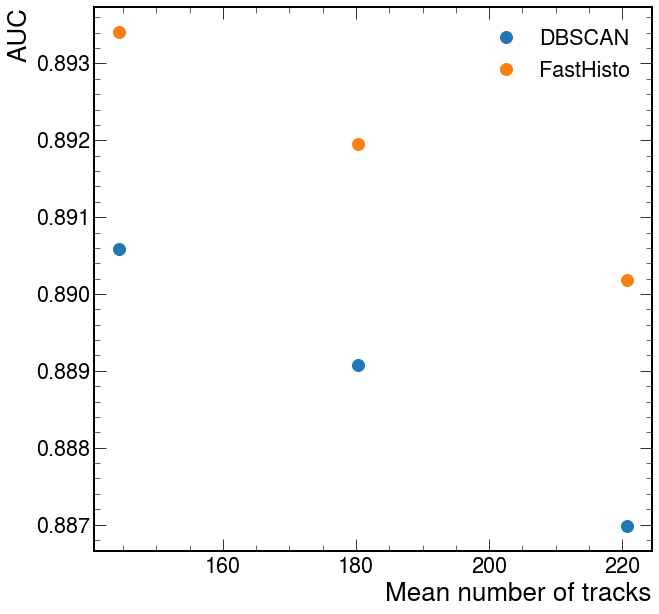

In [177]:
plt.plot(bins_mid, db_AUC, 'o', label ='DBSCAN', ms=12)
plt.plot(bins_mid, fh_AUC,'o', label ='FastHisto', ms=12)
plt.legend()
plt.xlabel('Mean number of tracks')
plt.ylabel("AUC")


In [178]:
pv1.trk

trk_pt   trk_eta   trk_phi  trk_d0     trk_z0  trk_fake  \
entry  subentry                                                              
0      0         2.623967  1.301414 -0.289234   999.0  -0.878906         2   
       1         3.435026  0.566814 -0.159267   999.0   3.339844         2   
       2         3.774908  1.815973 -0.240375   999.0   4.921875         1   
       3         2.641448 -1.435747 -0.128747   999.0  -0.468750         2   
       4         2.320653  1.837421  0.032604   999.0   4.980469         1   
...                   ...       ...       ...     ...        ...       ...   
222973 153       2.327952  1.944034 -0.237651   999.0  -0.585938         2   
       154       2.006145 -2.219047 -0.908713   999.0  10.195312         2   
       155       5.391940  2.357763 -0.499422   999.0  -1.523438         2   
       156       1.952859 -2.199984 -0.324764   999.0  -3.632812         2   
       157       3.152188  2.307447 -0.330013   999.0  -3.632812         2   

                 is_pv  event_number  z0_reco_fh  distance_from_pv_fh  \
entry  subentry                                                         
0      0             0             0    4.863511             5.861332   
       1             0             0    4.863511             1.642582   
       2             1             0    4.863511             0.060551   
       3             0             0    4.863511             5.451176   
       4             1             0    4.863511             0.001957   
...                ...           ...         ...                  ...   
222973 153           0        222973   -3.573989             2.869136   
       154           0        222973   -3.573989            13.650386   
       155           0        222973   -3.573989             1.931636   
       156           0        222973   -3.573989             0.177739   
       157           0        222973   -3.573989             0.177739   

                 trk_pv_assoc_fh  z0_reco_db  trk_pv_assoc_db  z0_reco_fh_cor  \
entry  subentry                                                                 
0      0                     0.0    4.980469              0.0        4.982426   
       1                     0.0    4.980469              0.0        4.982426   
       2                     1.0    4.980469              1.0        4.982426   
       3                     0.0    4.980469              0.0        4.982426   
       4                     1.0    4.980469              1.0        4.982426   
...                          ...         ...              ...             ...   
222973 153                   0.0   -3.574219              0.0       -3.455074   
       154                   0.0   -3.574219              0.0       -3.455074   
       155                   1.0   -3.574219              1.0       -3.455074   
       156                   1.0   -3.574219              1.0       -3.455074   
       157                   1.0   -3.574219              1.0       -3.455074   

                 z0_reco_db_cor  distance_from_pv_db  
entry  subentry                                       
0      0               5.014663             5.893569  
       1               5.014663             1.674819  
       2               5.014663             0.092788  
       3               5.014663             5.483413  
       4               5.014663             0.034194  
...                         ...                  ...  
222973 153            -3.607869             3.021931  
       154            -3.607869            13.803181  
       155            -3.607869             2.084431  
       156            -3.607869             0.024944  
       157            -3.607869             0.024944  

[7663518 rows x 16 columns]